# This is the final webscrapping Project
### Presented by Mohamad HACHEM and Aymen Bouguerra
#### Project topic:
<p>Our objective for project is to study the different features of every states that can affect Walmarts openings</p>
<ul>
    <li>we would like to see the repartition of Walmart throughout the country and try to understand this repartion</li>
    <li>Try to understand what are the main features that can affect a walmart</li>
    <li>Come to a conclusion to which is the highest features that would lead to the opening of a walmart</li>
</ul>
All these Points will be discused in the following work

##### Our first Goal is to understand how Walmart is scattered through the country
<p>To do that we need to do few things</p>
<ol>
    <li>we will start by webscarping the information of everystate in the US</li>
    <li>we will webscrap the number of Walmart in everystate</li>
    <li>then we will try to come out with the main factor that makes the number of Walmart excist in a state rather than the other</li>
</ol>

In [3]:
# importing our needed modules
import pandas as pd
from urllib import request
import bs4
from bs4 import BeautifulSoup

In [4]:
# creating our states data frame

# assigning the url
url = "https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States"

# getting a copy of the website
request_text = request.urlopen(url).read()

# let's see what we get
request_text[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of states and territories of the United States - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6246a0e8-0669-4fa9-a07c-a5cf2eef6d4a","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_states_and_territories_of_the_United_States","wgTitle":"List of states and territories of the United States","wgCurRevisionId":1132366581,"wgRevisionId":1132366581,"wgArticleId":12610470,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","CS1 mai

In [5]:
len(request_text)

389892

In [3]:
# let's use beautiful soup to be able to parse the website as we please
html_page = bs4.BeautifulSoup(request_text, "html")
print("html_page is stored")

html_page is stored


In [45]:
# our target is to take the first table in that page
# targeting the table
needed_table = html_page.find("table",{'class':'wikitable'})

# we are only gonna take the <tr> tags to avoid very long HTML webpages source code
print(needed_table.tr)

<tr>
<th colspan="2" rowspan="2" scope="col">Flag, name and<br/><a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">postal abbreviation</a><sup class="reference" id="cite_ref-USPSabbreviations_8-0"><a href="#cite_note-USPSabbreviations-8">[8]</a></sup>
</th>
<th colspan="2" scope="col">Cities
</th>
<th rowspan="2" scope="col">Ratification or<br/>admission<sup class="reference" id="cite_ref-10"><a href="#cite_note-10">[A]</a></sup>
</th>
<th rowspan="2" scope="col">Population<br/><sup class="reference" id="cite_ref-:0_11-0"><a href="#cite_note-:0-11">[10]</a></sup>
</th>
<th colspan="2" scope="col">Total area<sup class="reference" id="cite_ref-areameasurements_12-0"><a href="#cite_note-areameasurements-12">[11]</a></sup>
</th>
<th colspan="2" scope="col">Land area<sup class="reference" id="cite_ref-areameasurements_12-1"><a href="#cite_note-areameasurements-12">[11]</a></sup>
</th>
<th colspan="2" scope="col">Water area<sup class

### Now that we have our needed table let's scrap the headings first
we are going to use the previous needed table to take the headers

In [5]:
# taking headers
headers = []
for header in needed_table.findAll('th'):
    title = header.text
    headers.append(title)
headers

['Flag, name andpostal abbreviation[8]\n',
 'Cities\n',
 'Ratification oradmission[A]\n',
 'Population[10]\n',
 'Total area[11]\n',
 'Land area[11]\n',
 'Water area[11]\n',
 'Numberof Reps.\n',
 'Capital\n',
 'Largest[12]\n',
 'mi2\n',
 'km2\n',
 'mi2\n',
 'km2\n',
 'mi2\n',
 'km2\n',
 '\xa0Alabama\n',
 '\xa0Alaska\n',
 '\xa0Arizona\n',
 '\xa0Arkansas\n',
 '\xa0California\n',
 '\xa0Colorado\n',
 '\xa0Connecticut\n',
 '\xa0Delaware\n',
 '\xa0Florida\n',
 '\xa0Georgia\n',
 '\xa0Hawaii\n',
 '\xa0Idaho\n',
 '\xa0Illinois\n',
 '\xa0Indiana\n',
 '\xa0Iowa\n',
 '\xa0Kansas\n',
 '\xa0Kentucky[B]\n',
 '\xa0Louisiana\n',
 '\xa0Maine\n',
 '\xa0Maryland\n',
 '\xa0Massachusetts[B]\n',
 '\xa0Michigan\n',
 '\xa0Minnesota\n',
 '\xa0Mississippi\n',
 '\xa0Missouri\n',
 '\xa0Montana\n',
 '\xa0Nebraska\n',
 '\xa0Nevada\n',
 '\xa0New Hampshire\n',
 '\xa0New Jersey\n',
 '\xa0New Mexico\n',
 '\xa0New York\n',
 '\xa0North Carolina\n',
 '\xa0North Dakota\n',
 '\xa0Ohio\n',
 '\xa0Oklahoma\n',
 '\xa0Oregon\n',
 

Now that we webscrapped the headers let's clean the headers to use them later

In [6]:
# storing the states
states = headers[16:]
states = [i[1:-1] for i in states]
states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky[B]',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts[B]',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania[B]',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia[B]',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [7]:
# we need to adjust our headers
# removing the names of the states
headers = headers[:15]

# renaming first column to state_name
headers[0] = "state_name"
headers[1] = "Capital"
headers[2] = "Largest_city"
headers[3] = "Admission"
headers[4] = "Population"
headers[5] = "Area_mi2"
headers[6] = "land_area_mi2"
headers[7] = "water_area_mi2"
headers[8] = "number_of_representation"
headers = headers[0:9]
headers

['state_name',
 'Capital',
 'Largest_city',
 'Admission',
 'Population',
 'Area_mi2',
 'land_area_mi2',
 'water_area_mi2',
 'number_of_representation']

In [8]:
#let's create a dataframe with the current headers
data = pd.DataFrame(columns=headers)
data

,state_name,Capital,Largest_city,Admission,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation


### Building the core of our dataframe
#### we need to do the following apps
<ul>
    <li>Take every single table row</li>
    <li>Take every cell in every row and take the text from it</li>
    <li>Build a new row of the content that we took</li>
    <li>Remove all columns that we don't need</li>
    <li>Add the new row to the dataframe we are building</li>
   </ul>

In [9]:
# let's fill our data

for i in needed_table.find_all('tr')[2:]:
    # taking the index we are working at
    length = len(data)
    
    # taking all the tds inside the trs
    row_data = i.find_all('td')
    
    # taking all the text from the row data
    row = [j.text[0:-1] for j in row_data]
    
    #inserting city twice for the city where capital and city are the same
    if len(row) == 11:
        row.insert(2, row[1])
   
    # inserting the name of the state in the right place
    row.insert(0,states[length])
    

    # we will only put into the data frame the data we need
    useless_indexes = [1,6,8,10]
    row = [row[i] for i in range(len(row)) if i not in useless_indexes]
    
    # transforming data into int
    for i in range(len(row)):
        if i > 3:
            row[i] = row[i].replace(',','_')
            row[i] = int(row[i])
    
    # checking if the largest city in the state is the same as the capital
    data.loc[length] = row

data

,state_name,Capital,Largest_city,Admission,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation
0,Alabama,Montgomery,Huntsville,"Dec 14, 1819",5024279,135767,131171,4597,7
1,Alaska,Juneau,Anchorage,"Jan 3, 1959",733391,1723337,1477953,245384,1
2,Arizona,Phoenix,Phoenix,"Feb 14, 1912",7151502,295234,294207,1026,9
3,Arkansas,Little Rock,Little Rock,"Jun 15, 1836",3011524,137732,134771,2961,4
4,California,Sacramento,Los Angeles,"Sep 9, 1850",39538223,423967,403466,20501,53
5,Colorado,Denver,Denver,"Aug 1, 1876",5773714,269601,268431,1170,7
6,Connecticut,Hartford,Bridgeport,"Jan 9, 1788",3605944,14357,12542,1816,5
7,Delaware,Dover,Wilmington,"Dec 7, 1787",989948,6446,5047,1399,1
8,Florida,Tallahassee,Jacksonville,"Mar 3, 1845",21538187,170312,138887,31424,27
9,Georgia,Atlanta,Atlanta,"Jan 2, 1788",10711908,153910,148959,4951,14


<p> Now that we have our dataframe of states data we can proceed forward</p>
<p> we can now webscarp the amount of Walmart avaialable in every state the update our data frame</p>

In [10]:
# starting to take the url of needed place
url2 = "https://en.wikipedia.org/wiki/Walmart"

# getting a copy of the website
request_text = request.urlopen(url2).read()

# let's see what we get
request_text[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Walmart - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6eec271b-23c5-40f4-9e9c-f8046b5e7c7d","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Walmart","wgTitle":"Walmart","wgCurRevisionId":1131131852,"wgRevisionId":1131131852,"wgArticleId":33589,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Webarchive template wayback links","CS1 German-language sources (de)","Articles with short description","Short descriptio

In [11]:
# let's use beautiful soup to be able to parse the website as we please
html_page2 = bs4.BeautifulSoup(request_text, "html")
print("html_page2 is stored")

html_page2 is stored


In [49]:
# our target is to take the first table in that page
# targeting the table
chart_states = html_page2.find("table",{'class':'wikitable'})

# taking only <tr> tags to reduce our output and not get long HTML source code 
print(chart_states.tr)

<tr>
<th>State</th>
<th>Supercenters</th>
<th>Discount<br/>Stores</th>
<th>Neighborhood<br/>Markets</th>
<th>Amigos</th>
<th>Sam's<br/>Clubs</th>
<th>Other<br/>Pharmacy<br/>Formats</th>
<th>Total<br/>stores
</th></tr>


#### We are going to clean the source code and retreive in form of a dictionary the needed Dictionary

In [13]:
# let's take the number of Walmart in every state and add it to our Dataframe
states = {}
for i in chart_states.find_all('tr')[1:]:
    # taking the index we are working at
    length = len(data)
    
    # taking all the tds inside the trs
    row_data = i.find_all('td')
    
    # taking all the text from the row data
    row = [j.text for j in row_data]
    
    states[row[0][0:row[0].index('[')]] = row[-1][0:-1]

#deleting states where the previous dataset don't contains
del states['District of Columbia']
del states['Puerto Rico']
states

{'Alabama': '144',
 'Alaska': '9',
 'Arizona': '124',
 'Arkansas': '133',
 'California': '309',
 'Colorado': '105',
 'Connecticut': '34',
 'Delaware': '10',
 'Florida': '387',
 'Georgia': '215',
 'Hawaii': '12',
 'Idaho': '27',
 'Illinois': '184',
 'Indiana': '127',
 'Iowa': '69',
 'Kansas': '83',
 'Kentucky': '101',
 'Louisiana': '138',
 'Maine': '25',
 'Maryland': '60',
 'Massachusetts': '48',
 'Michigan': '117',
 'Minnesota': '80',
 'Mississippi': '86',
 'Missouri': '156',
 'Montana': '16',
 'Nebraska': '47',
 'Nevada': '50',
 'New Hampshire': '28',
 'New Jersey': '70',
 'New Mexico': '53',
 'New York': '111',
 'North Carolina': '214',
 'North Dakota': '17',
 'Ohio': '170',
 'Oklahoma': '134',
 'Oregon': '45',
 'Pennsylvania': '160',
 'Rhode Island': '9',
 'South Carolina': '122',
 'South Dakota': '17',
 'Tennessee': '150',
 'Texas': '593',
 'Utah': '59',
 'Vermont': '6',
 'Virginia': '149',
 'Washington': '65',
 'West Virginia': '44',
 'Wisconsin': '99',
 'Wyoming': '14'}

In [14]:
# let's create a df then add it to our exisiting one
df = pd.DataFrame(columns=['number_of_walmart'])
df

,number_of_walmart


In [15]:
for key, value in states.items():
    
    # assigning length to the current length of the dataframe
    length = len(df)
    
    # creating a new element in the data frame at the current position
    df.loc[length] = int(value)
df

,number_of_walmart
0,144
1,9
2,124
3,133
4,309
5,105
6,34
7,10
8,387
9,215


In [16]:
# creating a new column "Number_of_Walmart_stores" which will be our Y 
data['Number_of_Walmart_stores'] = df
data

,state_name,Capital,Largest_city,Admission,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation,Number_of_Walmart_stores
0,Alabama,Montgomery,Huntsville,"Dec 14, 1819",5024279,135767,131171,4597,7,144
1,Alaska,Juneau,Anchorage,"Jan 3, 1959",733391,1723337,1477953,245384,1,9
2,Arizona,Phoenix,Phoenix,"Feb 14, 1912",7151502,295234,294207,1026,9,124
3,Arkansas,Little Rock,Little Rock,"Jun 15, 1836",3011524,137732,134771,2961,4,133
4,California,Sacramento,Los Angeles,"Sep 9, 1850",39538223,423967,403466,20501,53,309
5,Colorado,Denver,Denver,"Aug 1, 1876",5773714,269601,268431,1170,7,105
6,Connecticut,Hartford,Bridgeport,"Jan 9, 1788",3605944,14357,12542,1816,5,34
7,Delaware,Dover,Wilmington,"Dec 7, 1787",989948,6446,5047,1399,1,10
8,Florida,Tallahassee,Jacksonville,"Mar 3, 1845",21538187,170312,138887,31424,27,387
9,Georgia,Atlanta,Atlanta,"Jan 2, 1788",10711908,153910,148959,4951,14,215


We would like to add the average of house income of the states to see if it can be one of the reasons

In [17]:
# starting to take the url of needed place
url3 = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income"

# getting a copy of the website
request_text = request.urlopen(url3).read()

# let's see what we get
request_text[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of U.S. states and territories by income - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9360246a-28ed-4c12-824e-86c1b27aec4f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_U.S._states_and_territories_by_income","wgTitle":"List of U.S. states and territories by income","wgCurRevisionId":1087558647,"wgRevisionId":1087558647,"wgArticleId":1979580,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","Articles with short descri

In [18]:
# let's use beautiful soup to be able to parse the website as we please
html_page3 = bs4.BeautifulSoup(request_text, "html")
print("html_page3 is stored")

html_page3 is stored


In [ ]:
# Let's get the average of household income per state
# targeting the table
household_income = html_page3.find("table",{'class':'wikitable'})
# we are going to only take the <tr> tags so we avoid very long HTML source code
print(household_income.tr)

### Adding more features
we tought and interesting feature to target is how much people make on average in every state

In [20]:
# let's take the number of Walmart in every state and add it to our Dataframe
states_income = {}
for i in household_income.find_all('tr')[2:]:
    # taking the index we are working at
    length = len(data)
    
    # taking all the tds inside the trs
    row_data = i.find_all('td')

    # taking all the text from the row data
    row = [j.text for j in row_data]
    
    # removing the ','
    row[2] = row[2][1:3] + row[2][4:-1]

        
    states_income[row[1][1:-1]] = float(row[2])

#deleting states where the previous dataset don't contains
# del states['District of Columbia']
# del states['Puerto Rico']
states_income = sorted(states_income.items())
states_income

[('Alabama', 51734.0),
 ('Alaska', 75463.0),
 ('Arizona', 62055.0),
 ('Arkansas', 48952.0),
 ('California', 80440.0),
 ('Colorado', 77127.0),
 ('Connecticut', 78833.0),
 ('Delaware', 70176.0),
 ('Florida', 59227.0),
 ('Georgia', 61980.0),
 ('Hawaii', 83102.0),
 ('Idaho', 60999.0),
 ('Illinois', 69187.0),
 ('Indiana', 57603.0),
 ('Iowa', 61691.0),
 ('Kansas', 62087.0),
 ('Kentucky', 52295.0),
 ('Louisiana', 51073.0),
 ('Maine', 58924.0),
 ('Maryland', 86738.0),
 ('Massachusetts', 85843.0),
 ('Michigan', 59584.0),
 ('Minnesota', 74593.0),
 ('Mississippi', 45792.0),
 ('Missouri', 57409.0),
 ('Montana', 57153.0),
 ('Nebraska', 63229.0),
 ('Nevada', 63276.0),
 ('New Hampshire', 77933.0),
 ('New Jersey', 85751.0),
 ('New Mexico', 51945.0),
 ('New York', 72108.0),
 ('North Carolina', 57341.0),
 ('North Dakota', 64577.0),
 ('Ohio', 58642.0),
 ('Oklahoma', 54449.0),
 ('Oregon', 67058.0),
 ('Pennsylvania', 63463.0),
 ('Rhode Island', 71169.0),
 ('South Carolina', 56227.0),
 ('South Dakota', 5953

In [21]:
# let's create a df then add it to our exisiting one
df2 = pd.DataFrame(columns=['avg_household_per_state'])
df2

,avg_household_per_state


In [22]:
for key, value in states_income:
    
    # assigning length to the current length of the dataframe
    length = len(df2)
    
    # creating a new row 
    df2.loc[length] = value
df2

,avg_household_per_state
0,51734.0
1,75463.0
2,62055.0
3,48952.0
4,80440.0
5,77127.0
6,78833.0
7,70176.0
8,59227.0
9,61980.0


In [23]:
# addinng this new feature as a column in our dataframe
data['avg_household_per_state'] = df2
data

,state_name,Capital,Largest_city,Admission,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation,Number_of_Walmart_stores,avg_household_per_state
0,Alabama,Montgomery,Huntsville,"Dec 14, 1819",5024279,135767,131171,4597,7,144,51734.0
1,Alaska,Juneau,Anchorage,"Jan 3, 1959",733391,1723337,1477953,245384,1,9,75463.0
2,Arizona,Phoenix,Phoenix,"Feb 14, 1912",7151502,295234,294207,1026,9,124,62055.0
3,Arkansas,Little Rock,Little Rock,"Jun 15, 1836",3011524,137732,134771,2961,4,133,48952.0
4,California,Sacramento,Los Angeles,"Sep 9, 1850",39538223,423967,403466,20501,53,309,80440.0
5,Colorado,Denver,Denver,"Aug 1, 1876",5773714,269601,268431,1170,7,105,77127.0
6,Connecticut,Hartford,Bridgeport,"Jan 9, 1788",3605944,14357,12542,1816,5,34,78833.0
7,Delaware,Dover,Wilmington,"Dec 7, 1787",989948,6446,5047,1399,1,10,70176.0
8,Florida,Tallahassee,Jacksonville,"Mar 3, 1845",21538187,170312,138887,31424,27,387,59227.0
9,Georgia,Atlanta,Atlanta,"Jan 2, 1788",10711908,153910,148959,4951,14,215,61980.0


In [24]:
# rearranging the order of my columns
data = data[['state_name','Capital','Largest_city','Admission','Population','Area_mi2','land_area_mi2','water_area_mi2','number_of_representation','avg_household_per_state','Number_of_Walmart_stores']]
data

,state_name,Capital,Largest_city,Admission,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation,avg_household_per_state,Number_of_Walmart_stores
0,Alabama,Montgomery,Huntsville,"Dec 14, 1819",5024279,135767,131171,4597,7,51734.0,144
1,Alaska,Juneau,Anchorage,"Jan 3, 1959",733391,1723337,1477953,245384,1,75463.0,9
2,Arizona,Phoenix,Phoenix,"Feb 14, 1912",7151502,295234,294207,1026,9,62055.0,124
3,Arkansas,Little Rock,Little Rock,"Jun 15, 1836",3011524,137732,134771,2961,4,48952.0,133
4,California,Sacramento,Los Angeles,"Sep 9, 1850",39538223,423967,403466,20501,53,80440.0,309
5,Colorado,Denver,Denver,"Aug 1, 1876",5773714,269601,268431,1170,7,77127.0,105
6,Connecticut,Hartford,Bridgeport,"Jan 9, 1788",3605944,14357,12542,1816,5,78833.0,34
7,Delaware,Dover,Wilmington,"Dec 7, 1787",989948,6446,5047,1399,1,70176.0,10
8,Florida,Tallahassee,Jacksonville,"Mar 3, 1845",21538187,170312,138887,31424,27,59227.0,387
9,Georgia,Atlanta,Atlanta,"Jan 2, 1788",10711908,153910,148959,4951,14,61980.0,215


### Now that we combined the needed features we cans start seeing what could be the main reason that drives Walmart to open a Store in a state

### Normalize the data


In [ ]:
from sklearn.preprocessing import StandardScaler
# normalize the data using StandardScaler
# Taking the columns that can be normalized
data2 = data[['Population','Area_mi2','land_area_mi2','water_area_mi2','number_of_representation','avg_household_per_state','Number_of_Walmart_stores']]

# building our scaler to transform our data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data2)

creating a dataframe of the standarized data 

In [38]:
# convert the normalized data to a pandas DataFrame
df = pd.DataFrame(scaled_data)
names = ['Population','Area_mi2','land_area_mi2','water_area_mi2','number_of_representation','avg_household_per_state','Number_of_Walmart_stores']
for i in range(len(df.columns)):
    # renaming every columns to the original naming
    df.rename(columns = {df.columns[i]:names[i]}, inplace = True)
df

,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation,avg_household_per_state,Number_of_Walmart_stores
0,-0.216116,-0.244045,-0.235324,-0.249539,-0.176614,-1.234209,0.380317
1,-0.799005,6.117854,5.885643,6.337977,-0.799960,0.889931,-0.919501
2,0.072854,0.394990,0.505656,-0.347236,0.031167,-0.310308,0.187751
3,-0.489536,-0.236171,-0.218962,-0.294297,-0.488287,-1.483244,0.274406
4,4.472383,0.910864,1.002225,0.185567,4.602365,1.335456,1.968983
5,-0.114310,0.292270,0.388507,-0.343296,-0.176614,1.038887,0.004814
6,-0.408787,-0.730574,-0.774479,-0.325623,-0.384396,1.191602,-0.678794
7,-0.764154,-0.762276,-0.808542,-0.337031,-0.799960,0.416657,-0.909872
8,2.027193,-0.105612,-0.200255,0.484401,1.901203,-0.563461,2.719989
9,0.556512,-0.171340,-0.154479,-0.239854,0.550621,-0.317021,1.063925


In [40]:
# checking the correlation matrix table
correlation_matrix = df.corr()
correlation_matrix

,Population,Area_mi2,land_area_mi2,water_area_mi2,number_of_representation,avg_household_per_state,Number_of_Walmart_stores
Population,1.000000,0.129596,0.140456,0.039275,0.998365,0.118638,0.823341
Area_mi2,0.129596,1.000000,0.995767,0.832981,0.119444,0.010288,0.150481
land_area_mi2,0.140456,0.995767,1.000000,0.778597,0.128543,-0.001607,0.171836
water_area_mi2,0.039275,0.832981,0.778597,1.000000,0.041678,0.079912,-0.007040
number_of_representation,0.998365,0.119444,0.128543,0.041678,1.000000,0.123930,0.802723
avg_household_per_state,0.118638,0.010288,-0.001607,0.079912,0.123930,1.000000,-0.181506
Number_of_Walmart_stores,0.823341,0.150481,0.171836,-0.007040,0.802723,-0.181506,1.000000


#### Visualizing our correlation
Let's draw what we have and check our plot

In [26]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We can check the correlation between features and conclude what type of feature is highly correlated meaning that the feature that are correlated the most should be the reason of success of a walmart opening

<AxesSubplot: >

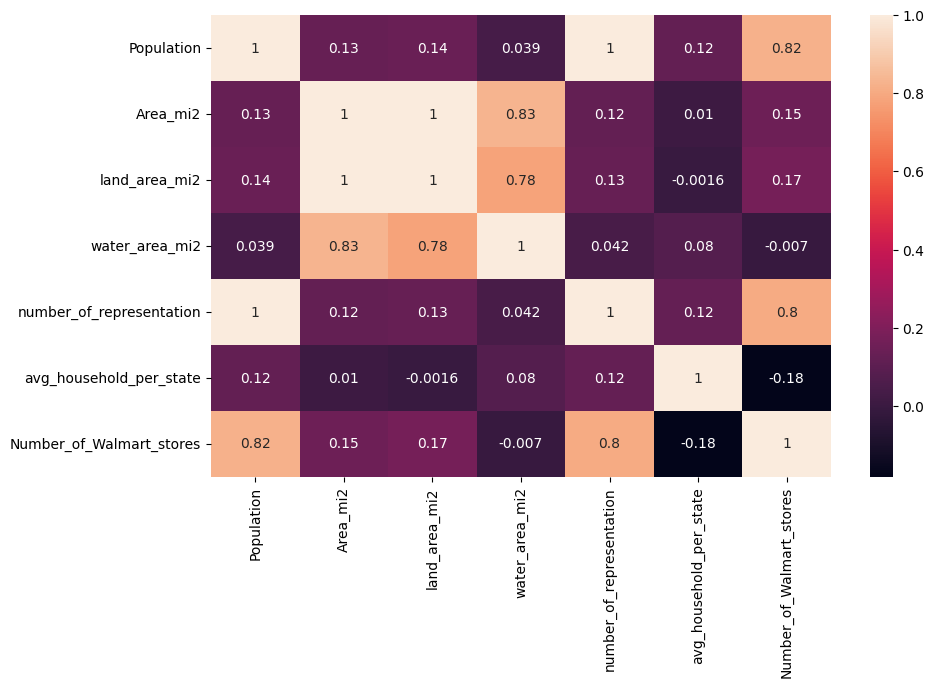

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), ax=ax, annot=True)

### After carefully looking at our heatmap we can conclude:
<ol>
    <li>that the number of Walmart per state is heavily correlated with the Population of that state</li>
    <li>unlike what we previously thought the average of a house hold income is not the main reason why Walmart prefers a state over the other</li>
    <li>Walmart will simply succeed more in more populated areas</li>
    </ol>